# Operaciones con dataframes - 
Referencia: https://aprendeconalf.es/docencia/python/manual/pandas/

Reshape: https://pandas.pydata.org/docs/user_guide/reshaping.html

#Lectura de Datos

In [59]:
import pandas as pd
import numpy as np

In [60]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [61]:
df = pd.read_csv('/content/gdrive/MyDrive/datasets/colesterol.csv')

#Descripción General


In [62]:
df.head()

,nombre,edad,sexo,peso,altura,colesterol
0,José Luis Martínez Izquierdo,18,H,85.0,179,182.0
1,Rosa Díaz Díaz,32,M,65.0,173,232.0
2,Javier García Sánchez,24,H,NaN,181,191.0
3,Carmen López Pinzón,35,M,65.0,170,200.0
4,Marisa López Collado,46,M,51.0,158,148.0


In [63]:
df.shape

(14, 6)

In [64]:
df.size

84

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   nombre      14 non-null     object 
 1   edad        14 non-null     int64  
 2   sexo        14 non-null     object 
 3   peso        13 non-null     float64
 4   altura      14 non-null     float64
 5   colesterol  13 non-null     float64
 6   diabetes    5 non-null      object 
 7   altura2     14 non-null     int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 1.0+ KB


In [65]:
#Mostrar las columnas
df.columns

Index(['nombre', 'edad', 'sexo', 'peso', 'altura', 'colesterol'], dtype='object')

In [66]:
df.index

RangeIndex(start=0, stop=14, step=1)

In [67]:
df.dtypes

nombre         object
edad            int64
sexo           object
peso          float64
altura          int64
colesterol    float64
dtype: object

#Acceso a elementos

## Acceso por posición

In [83]:
df 

,nombre,edad,sexo,peso,altura,colesterol,diabetes,altura2,fecha_nac
0,José Luis Martínez Izquierdo,18,H,85.0,1.79,182.0,False,32041,2000-03-05
1,Rosa Díaz Díaz,32,M,65.0,1.73,232.0,False,29929,2001-05-20
2,Javier García Sánchez,24,H,NaN,1.81,191.0,True,32761,1999-12-10
3,Carmen López Pinzón,35,M,65.0,1.70,200.0,False,28900,NaT
4,Marisa López Collado,46,M,51.0,1.58,148.0,True,24964,NaT
5,Antonio Ruiz Cruz,68,H,66.0,1.74,249.0,NaN,30276,NaT
6,Antonio Fernández Ocaña,51,H,62.0,1.72,276.0,NaN,29584,NaT
7,Pilar Martín González,22,M,60.0,1.66,NaN,NaN,27556,NaT
8,Pedro Gálvez Tenorio,35,H,90.0,1.94,241.0,NaN,37636,NaT
9,Santiago Reillo Manzano,46,H,75.0,1.85,280.0,NaN,34225,NaT


In [87]:
#Peso de Rosa Dïaz
df.iloc[1, 3]  #filas,columnas

65.0

In [91]:
#Peso de los dos primeros
df.iloc[:2, [0,3]]

,nombre,peso
0,José Luis Martínez Izquierdo,85.0
1,Rosa Díaz Díaz,65.0


##Acceso por nombre

In [84]:
df.loc[2, 'colesterol']

191.0

In [86]:
df.loc[:3, ('nombre','colesterol')]

,nombre,colesterol
0,José Luis Martínez Izquierdo,182.0
1,Rosa Díaz Díaz,232.0
2,Javier García Sánchez,191.0
3,Carmen López Pinzón,200.0


In [68]:
df.describe()

,edad,peso,altura,colesterol
count,14.000000,13.000000,14.000000,13.000000
mean,38.214286,70.923077,176.857143,220.230769
std,15.621379,16.126901,11.501553,39.847948
min,18.000000,51.000000,158.000000,148.000000
25%,24.750000,61.000000,170.500000,194.000000
50%,35.000000,65.000000,175.500000,210.000000
75%,49.750000,78.000000,184.000000,249.000000
max,68.000000,109.000000,198.000000,280.000000


In [69]:
df.head(14)

,nombre,edad,sexo,peso,altura,colesterol
0,José Luis Martínez Izquierdo,18,H,85.0,179,182.0
1,Rosa Díaz Díaz,32,M,65.0,173,232.0
2,Javier García Sánchez,24,H,NaN,181,191.0
3,Carmen López Pinzón,35,M,65.0,170,200.0
4,Marisa López Collado,46,M,51.0,158,148.0
5,Antonio Ruiz Cruz,68,H,66.0,174,249.0
6,Antonio Fernández Ocaña,51,H,62.0,172,276.0
7,Pilar Martín González,22,M,60.0,166,NaN
8,Pedro Gálvez Tenorio,35,H,90.0,194,241.0
9,Santiago Reillo Manzano,46,H,75.0,185,280.0


#Operaciones con columnas


## Agregar columnas al data frame

In [78]:
df['diabetes']=pd.Series([False, False, True, False, True])
df['fecha_nac']=pd.Series(['05-03-2000', '20-05-2001', '10-12-1999'])
df

,nombre,edad,sexo,peso,altura,colesterol,diabetes,altura2,fecha_nac
0,José Luis Martínez Izquierdo,18,H,85.0,1.79,182.0,False,32041,05-03-2000
1,Rosa Díaz Díaz,32,M,65.0,1.73,232.0,False,29929,20-05-2001
2,Javier García Sánchez,24,H,NaN,1.81,191.0,True,32761,10-12-1999
3,Carmen López Pinzón,35,M,65.0,1.70,200.0,False,28900,NaN
4,Marisa López Collado,46,M,51.0,1.58,148.0,True,24964,NaN
5,Antonio Ruiz Cruz,68,H,66.0,1.74,249.0,NaN,30276,NaN
6,Antonio Fernández Ocaña,51,H,62.0,1.72,276.0,NaN,29584,NaN
7,Pilar Martín González,22,M,60.0,1.66,NaN,NaN,27556,NaN
8,Pedro Gálvez Tenorio,35,H,90.0,1.94,241.0,NaN,37636,NaN
9,Santiago Reillo Manzano,46,H,75.0,1.85,280.0,NaN,34225,NaN


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   nombre      14 non-null     object 
 1   edad        14 non-null     int64  
 2   sexo        14 non-null     object 
 3   peso        13 non-null     float64
 4   altura      14 non-null     float64
 5   colesterol  13 non-null     float64
 6   diabetes    5 non-null      object 
 7   altura2     14 non-null     int64  
 8   fecha_nac   3 non-null      object 
dtypes: float64(3), int64(2), object(4)
memory usage: 1.1+ KB


## Cambiar tipo de dato de columna a datetime

In [81]:
df['fecha_nac'] = pd.to_datetime(df.fecha_nac, format = '%d-%m-%Y')
df

,nombre,edad,sexo,peso,altura,colesterol,diabetes,altura2,fecha_nac
0,José Luis Martínez Izquierdo,18,H,85.0,1.79,182.0,False,32041,2000-03-05
1,Rosa Díaz Díaz,32,M,65.0,1.73,232.0,False,29929,2001-05-20
2,Javier García Sánchez,24,H,NaN,1.81,191.0,True,32761,1999-12-10
3,Carmen López Pinzón,35,M,65.0,1.70,200.0,False,28900,NaT
4,Marisa López Collado,46,M,51.0,1.58,148.0,True,24964,NaT
5,Antonio Ruiz Cruz,68,H,66.0,1.74,249.0,NaN,30276,NaT
6,Antonio Fernández Ocaña,51,H,62.0,1.72,276.0,NaN,29584,NaT
7,Pilar Martín González,22,M,60.0,1.66,NaN,NaN,27556,NaT
8,Pedro Gálvez Tenorio,35,H,90.0,1.94,241.0,NaN,37636,NaT
9,Santiago Reillo Manzano,46,H,75.0,1.85,280.0,NaN,34225,NaT


In [82]:
df.dtypes

nombre                object
edad                   int64
sexo                  object
peso                 float64
altura               float64
colesterol           float64
diabetes              object
altura2                int64
fecha_nac     datetime64[ns]
dtype: object

## Operación sobre una columna
Dividir la columna entre un valor

In [74]:
#Mostrar altura en metros
df['altura']/100

0     1.79
1     1.73
2     1.81
3     1.70
4     1.58
5     1.74
6     1.72
7     1.66
8     1.94
9     1.85
10    1.62
11    1.87
12    1.98
13    1.77
Name: altura, dtype: float64

In [75]:
df

,nombre,edad,sexo,peso,altura,colesterol,diabetes,altura2
0,José Luis Martínez Izquierdo,18,H,85.0,179,182.0,False,32041
1,Rosa Díaz Díaz,32,M,65.0,173,232.0,False,29929
2,Javier García Sánchez,24,H,NaN,181,191.0,True,32761
3,Carmen López Pinzón,35,M,65.0,170,200.0,False,28900
4,Marisa López Collado,46,M,51.0,158,148.0,True,24964
5,Antonio Ruiz Cruz,68,H,66.0,174,249.0,NaN,30276
6,Antonio Fernández Ocaña,51,H,62.0,172,276.0,NaN,29584
7,Pilar Martín González,22,M,60.0,166,NaN,NaN,27556
8,Pedro Gálvez Tenorio,35,H,90.0,194,241.0,NaN,37636
9,Santiago Reillo Manzano,46,H,75.0,185,280.0,NaN,34225


In [76]:
df['altura']=df['altura']/100
df

,nombre,edad,sexo,peso,altura,colesterol,diabetes,altura2
0,José Luis Martínez Izquierdo,18,H,85.0,1.79,182.0,False,32041
1,Rosa Díaz Díaz,32,M,65.0,1.73,232.0,False,29929
2,Javier García Sánchez,24,H,NaN,1.81,191.0,True,32761
3,Carmen López Pinzón,35,M,65.0,1.70,200.0,False,28900
4,Marisa López Collado,46,M,51.0,1.58,148.0,True,24964
5,Antonio Ruiz Cruz,68,H,66.0,1.74,249.0,NaN,30276
6,Antonio Fernández Ocaña,51,H,62.0,1.72,276.0,NaN,29584
7,Pilar Martín González,22,M,60.0,1.66,NaN,NaN,27556
8,Pedro Gálvez Tenorio,35,H,90.0,1.94,241.0,NaN,37636
9,Santiago Reillo Manzano,46,H,75.0,1.85,280.0,NaN,34225


##Aplicar funciones a una columna

In [73]:
df['altura2']=df['altura'].apply(np.square)

In [56]:
df['imc']=df['peso']/df['altura2']
df

,nombre,edad,sexo,peso,altura,colesterol,diabetes,altura2,imc
0,José Luis Martínez Izquierdo,18,H,85.0,1.79,182.0,False,3.2041,26.52851
1,Rosa Díaz Díaz,32,M,65.0,1.73,232.0,False,2.9929,21.718066
2,Javier García Sánchez,24,H,NaN,1.81,191.0,True,3.2761,NaN
3,Carmen López Pinzón,35,M,65.0,1.7,200.0,False,2.89,22.491349
4,Marisa López Collado,46,M,51.0,1.58,148.0,True,2.4964,20.429418
5,Antonio Ruiz Cruz,68,H,66.0,1.74,249.0,NaN,3.0276,21.799445
6,Antonio Fernández Ocaña,51,H,62.0,1.72,276.0,NaN,2.9584,20.957274
7,Pilar Martín González,22,M,60.0,1.66,NaN,NaN,2.7556,21.773842
8,Pedro Gálvez Tenorio,35,H,90.0,1.94,241.0,NaN,3.7636,23.913275
9,Santiago Reillo Manzano,46,H,75.0,1.85,280.0,NaN,3.4225,21.913806


## Renombrar columnas si es necesario
 * Usar el método rename
 * Usar inplace=True para que los cambios tengan efecto en el mismo dataframe

 df.rename(columns={'nombre_actual': 'nombre_nuevo', 'nombre_actual': 'nombre_nuevo'}, inplace=True)

In [17]:
df.rename(columns={'diabetes': 'diabetes_mellitus'}, inplace=True)
df

,nombre,edad,sexo,peso,altura,colesterol,diabetes_mellitus
0,José Luis Martínez Izquierdo,18,H,85.0,1.79,182.0,False
1,Rosa Díaz Díaz,32,M,65.0,1.73,232.0,False
2,Javier García Sánchez,24,H,NaN,1.81,191.0,True
3,Carmen López Pinzón,35,M,65.0,1.70,200.0,False
4,Marisa López Collado,46,M,51.0,1.58,148.0,True
5,Antonio Ruiz Cruz,68,H,66.0,1.74,249.0,NaN
6,Antonio Fernández Ocaña,51,H,62.0,1.72,276.0,NaN
7,Pilar Martín González,22,M,60.0,1.66,NaN,NaN
8,Pedro Gálvez Tenorio,35,H,90.0,1.94,241.0,NaN
9,Santiago Reillo Manzano,46,H,75.0,1.85,280.0,NaN


## Seleccionar ciertas columnas de un dataframe


In [18]:
#Se crea un nuevo dataframe con las columnas seleccionadas 
df2=df[['nombre', 'edad']]
df2

,nombre,edad
0,José Luis Martínez Izquierdo,18
1,Rosa Díaz Díaz,32
2,Javier García Sánchez,24
3,Carmen López Pinzón,35
4,Marisa López Collado,46
5,Antonio Ruiz Cruz,68
6,Antonio Fernández Ocaña,51
7,Pilar Martín González,22
8,Pedro Gálvez Tenorio,35
9,Santiago Reillo Manzano,46


## Eliminar columnas de un dataframe

del d[nombre] : Elimina la columna indicada del DataFrame df.

df.pop(nombre) : Elimina la columna indicada del DataFrame df y la devuelve como una serie.


In [19]:
del(df['diabetes_mellitus'])
df

,nombre,edad,sexo,peso,altura,colesterol
0,José Luis Martínez Izquierdo,18,H,85.0,1.79,182.0
1,Rosa Díaz Díaz,32,M,65.0,1.73,232.0
2,Javier García Sánchez,24,H,NaN,1.81,191.0
3,Carmen López Pinzón,35,M,65.0,1.70,200.0
4,Marisa López Collado,46,M,51.0,1.58,148.0
5,Antonio Ruiz Cruz,68,H,66.0,1.74,249.0
6,Antonio Fernández Ocaña,51,H,62.0,1.72,276.0
7,Pilar Martín González,22,M,60.0,1.66,NaN
8,Pedro Gálvez Tenorio,35,H,90.0,1.94,241.0
9,Santiago Reillo Manzano,46,H,75.0,1.85,280.0


#Operaciones con Filas/Renglones

## Añadir una fila a un dataframe

In [20]:
#df.append(pd.Series(['Carlos Rivas', 28, 'H', 89.0, 1.78, 245.0], index=['nombre','edad','sexo','peso','altura','colesterol']), ignore_index=True)
#Append deprecado, usar concat.
s2 = pd.Series(['Carlos Rivas', 28, 'H', 89.0, 1.78, 245.0], index=['nombre','edad','sexo','peso','altura','colesterol'])
s2

nombre        Carlos Rivas
edad                    28
sexo                     H
peso                  89.0
altura                1.78
colesterol           245.0
dtype: object

In [21]:
#Convertir a dataframe y aplicar la transpuesta
s2.to_frame().T


,nombre,edad,sexo,peso,altura,colesterol
0,Carlos Rivas,28,H,89.0,1.78,245.0


In [22]:
pd.concat([df,s2.to_frame().T], ignore_index=True)


,nombre,edad,sexo,peso,altura,colesterol
0,José Luis Martínez Izquierdo,18,H,85.0,1.79,182.0
1,Rosa Díaz Díaz,32,M,65.0,1.73,232.0
2,Javier García Sánchez,24,H,NaN,1.81,191.0
3,Carmen López Pinzón,35,M,65.0,1.7,200.0
4,Marisa López Collado,46,M,51.0,1.58,148.0
5,Antonio Ruiz Cruz,68,H,66.0,1.74,249.0
6,Antonio Fernández Ocaña,51,H,62.0,1.72,276.0
7,Pilar Martín González,22,M,60.0,1.66,NaN
8,Pedro Gálvez Tenorio,35,H,90.0,1.94,241.0
9,Santiago Reillo Manzano,46,H,75.0,1.85,280.0


In [23]:
df

,nombre,edad,sexo,peso,altura,colesterol
0,José Luis Martínez Izquierdo,18,H,85.0,1.79,182.0
1,Rosa Díaz Díaz,32,M,65.0,1.73,232.0
2,Javier García Sánchez,24,H,NaN,1.81,191.0
3,Carmen López Pinzón,35,M,65.0,1.70,200.0
4,Marisa López Collado,46,M,51.0,1.58,148.0
5,Antonio Ruiz Cruz,68,H,66.0,1.74,249.0
6,Antonio Fernández Ocaña,51,H,62.0,1.72,276.0
7,Pilar Martín González,22,M,60.0,1.66,NaN
8,Pedro Gálvez Tenorio,35,H,90.0,1.94,241.0
9,Santiago Reillo Manzano,46,H,75.0,1.85,280.0


Es necesario guardarlo en el dataframe


In [24]:
#df=df.append(pd.Series(['Carlos Rivas', 28, 'H', 89.0, 1.78, 245.0], index=['nombre','edad','sexo','peso','altura','colesterol']), ignore_index=True)
s2 = pd.Series(['Carlos Rivas', 28, 'H', 89.0, 1.78, 245.0], index=['nombre','edad','sexo','peso','altura','colesterol'])
df = pd.concat([df,s2.to_frame().T], ignore_index=True)
df.tail()

,nombre,edad,sexo,peso,altura,colesterol
10,Macarena Álvarez Luna,53,M,55.0,1.62,262.0
11,José María de la Guía Sanz,58,H,78.0,1.87,198.0
12,Miguel Angel Cuadrado Gutiérrez,27,H,109.0,1.98,210.0
13,Carolina Rubio Moreno,20,M,61.0,1.77,194.0
14,Carlos Rivas,28,H,89.0,1.78,245.0


##Seleccionar filas de un dataframe
select the rows of the dataframe for which float column is larger than 0.15
Select the rows for which float column is larger than 0.1 and integer column is larger than 2. Change 'and' by 'or'
Select the rows for which string column is not 'a'

In [25]:
df[df.peso>80]

,nombre,edad,sexo,peso,altura,colesterol
0,José Luis Martínez Izquierdo,18,H,85.0,1.79,182.0
8,Pedro Gálvez Tenorio,35,H,90.0,1.94,241.0
12,Miguel Angel Cuadrado Gutiérrez,27,H,109.0,1.98,210.0
14,Carlos Rivas,28,H,89.0,1.78,245.0


In [26]:
df.loc[df['peso'] > 80]

,nombre,edad,sexo,peso,altura,colesterol
0,José Luis Martínez Izquierdo,18,H,85.0,1.79,182.0
8,Pedro Gálvez Tenorio,35,H,90.0,1.94,241.0
12,Miguel Angel Cuadrado Gutiérrez,27,H,109.0,1.98,210.0
14,Carlos Rivas,28,H,89.0,1.78,245.0


In [27]:
df[(df.peso>80) & (df.colesterol>200)]

,nombre,edad,sexo,peso,altura,colesterol
8,Pedro Gálvez Tenorio,35,H,90.0,1.94,241.0
12,Miguel Angel Cuadrado Gutiérrez,27,H,109.0,1.98,210.0
14,Carlos Rivas,28,H,89.0,1.78,245.0


In [28]:
df[(df.peso > 80) | (df.colesterol>200)]

,nombre,edad,sexo,peso,altura,colesterol
0,José Luis Martínez Izquierdo,18,H,85.0,1.79,182.0
1,Rosa Díaz Díaz,32,M,65.0,1.73,232.0
5,Antonio Ruiz Cruz,68,H,66.0,1.74,249.0
6,Antonio Fernández Ocaña,51,H,62.0,1.72,276.0
8,Pedro Gálvez Tenorio,35,H,90.0,1.94,241.0
9,Santiago Reillo Manzano,46,H,75.0,1.85,280.0
10,Macarena Álvarez Luna,53,M,55.0,1.62,262.0
12,Miguel Angel Cuadrado Gutiérrez,27,H,109.0,1.98,210.0
14,Carlos Rivas,28,H,89.0,1.78,245.0


In [29]:
df[(df.edad > 18)]

,nombre,edad,sexo,peso,altura,colesterol
1,Rosa Díaz Díaz,32,M,65.0,1.73,232.0
2,Javier García Sánchez,24,H,NaN,1.81,191.0
3,Carmen López Pinzón,35,M,65.0,1.7,200.0
4,Marisa López Collado,46,M,51.0,1.58,148.0
5,Antonio Ruiz Cruz,68,H,66.0,1.74,249.0
6,Antonio Fernández Ocaña,51,H,62.0,1.72,276.0
7,Pilar Martín González,22,M,60.0,1.66,NaN
8,Pedro Gálvez Tenorio,35,H,90.0,1.94,241.0
9,Santiago Reillo Manzano,46,H,75.0,1.85,280.0
10,Macarena Álvarez Luna,53,M,55.0,1.62,262.0


In [30]:
df[~(df.edad > 18)]

,nombre,edad,sexo,peso,altura,colesterol
0,José Luis Martínez Izquierdo,18,H,85.0,1.79,182.0


In [32]:
df.loc[df['nombre'] != 'Carlos Rivas']

,nombre,edad,sexo,peso,altura,colesterol
0,José Luis Martínez Izquierdo,18,H,85.0,1.79,182.0
1,Rosa Díaz Díaz,32,M,65.0,1.73,232.0
2,Javier García Sánchez,24,H,NaN,1.81,191.0
3,Carmen López Pinzón,35,M,65.0,1.7,200.0
4,Marisa López Collado,46,M,51.0,1.58,148.0
5,Antonio Ruiz Cruz,68,H,66.0,1.74,249.0
6,Antonio Fernández Ocaña,51,H,62.0,1.72,276.0
7,Pilar Martín González,22,M,60.0,1.66,NaN
8,Pedro Gálvez Tenorio,35,H,90.0,1.94,241.0
9,Santiago Reillo Manzano,46,H,75.0,1.85,280.0


## Eliminar filas de un dataframe

In [106]:
#Drop: Elimina los renglones con los indices indcados
df.drop([1,3])

,nombre,edad,sexo,peso,altura,colesterol
0,José Luis Martínez Izquierdo,18,H,85.0,1.79,182.0
2,Javier García Sánchez,24,H,NaN,1.81,191.0
4,Marisa López Collado,46,M,51.0,1.58,148.0
5,Antonio Ruiz Cruz,68,H,66.0,1.74,249.0
6,Antonio Fernández Ocaña,51,H,62.0,1.72,276.0
7,Pilar Martín González,22,M,60.0,1.66,NaN
8,Pedro Gálvez Tenorio,35,H,90.0,1.94,241.0
9,Santiago Reillo Manzano,46,H,75.0,1.85,280.0
10,Macarena Álvarez Luna,53,M,55.0,1.62,262.0
11,José María de la Guía Sanz,58,H,78.0,1.87,198.0


In [107]:
df

,nombre,edad,sexo,peso,altura,colesterol
0,José Luis Martínez Izquierdo,18,H,85.0,1.79,182.0
1,Rosa Díaz Díaz,32,M,65.0,1.73,232.0
2,Javier García Sánchez,24,H,NaN,1.81,191.0
3,Carmen López Pinzón,35,M,65.0,1.7,200.0
4,Marisa López Collado,46,M,51.0,1.58,148.0
5,Antonio Ruiz Cruz,68,H,66.0,1.74,249.0
6,Antonio Fernández Ocaña,51,H,62.0,1.72,276.0
7,Pilar Martín González,22,M,60.0,1.66,NaN
8,Pedro Gálvez Tenorio,35,H,90.0,1.94,241.0
9,Santiago Reillo Manzano,46,H,75.0,1.85,280.0


In [108]:
#Reasignarlo al dataframe
df = df.drop([1,3])
df

,nombre,edad,sexo,peso,altura,colesterol
0,José Luis Martínez Izquierdo,18,H,85.0,1.79,182.0
2,Javier García Sánchez,24,H,NaN,1.81,191.0
4,Marisa López Collado,46,M,51.0,1.58,148.0
5,Antonio Ruiz Cruz,68,H,66.0,1.74,249.0
6,Antonio Fernández Ocaña,51,H,62.0,1.72,276.0
7,Pilar Martín González,22,M,60.0,1.66,NaN
8,Pedro Gálvez Tenorio,35,H,90.0,1.94,241.0
9,Santiago Reillo Manzano,46,H,75.0,1.85,280.0
10,Macarena Álvarez Luna,53,M,55.0,1.62,262.0
11,José María de la Guía Sanz,58,H,78.0,1.87,198.0


## Eliminar filas que tienen algún dato desconocido

In [109]:
#Se eliminarán a los renglones 2 y 7 que tienen NA
df=df.dropna()
df

,nombre,edad,sexo,peso,altura,colesterol
0,José Luis Martínez Izquierdo,18,H,85.0,1.79,182.0
4,Marisa López Collado,46,M,51.0,1.58,148.0
5,Antonio Ruiz Cruz,68,H,66.0,1.74,249.0
6,Antonio Fernández Ocaña,51,H,62.0,1.72,276.0
8,Pedro Gálvez Tenorio,35,H,90.0,1.94,241.0
9,Santiago Reillo Manzano,46,H,75.0,1.85,280.0
10,Macarena Álvarez Luna,53,M,55.0,1.62,262.0
11,José María de la Guía Sanz,58,H,78.0,1.87,198.0
12,Miguel Angel Cuadrado Gutiérrez,27,H,109.0,1.98,210.0
13,Carolina Rubio Moreno,20,M,61.0,1.77,194.0


#Agrupación, Ordenamiento y Agregación de datos

In [39]:
#Agrupación de datos

df.groupby('sexo').get_group('M')

,nombre,edad,sexo,peso,altura,colesterol
1,Rosa Díaz Díaz,32,M,65.0,1.73,232.0
3,Carmen López Pinzón,35,M,65.0,1.7,200.0
4,Marisa López Collado,46,M,51.0,1.58,148.0
7,Pilar Martín González,22,M,60.0,1.66,NaN
10,Macarena Álvarez Luna,53,M,55.0,1.62,262.0
13,Carolina Rubio Moreno,20,M,61.0,1.77,194.0


In [48]:
dfh = df.groupby('sexo').get_group('H')
dfh

,nombre,edad,sexo,peso,altura,colesterol
0,José Luis Martínez Izquierdo,18,H,85.0,1.79,182.0
2,Javier García Sánchez,24,H,NaN,1.81,191.0
5,Antonio Ruiz Cruz,68,H,66.0,1.74,249.0
6,Antonio Fernández Ocaña,51,H,62.0,1.72,276.0
8,Pedro Gálvez Tenorio,35,H,90.0,1.94,241.0
9,Santiago Reillo Manzano,46,H,75.0,1.85,280.0
11,José María de la Guía Sanz,58,H,78.0,1.87,198.0
12,Miguel Angel Cuadrado Gutiérrez,27,H,109.0,1.98,210.0
14,Carlos Rivas,28,H,89.0,1.78,245.0


In [52]:
dfh.sort_values('colesterol')

,nombre,edad,sexo,peso,altura,colesterol
0,José Luis Martínez Izquierdo,18,H,85.0,1.79,182.0
2,Javier García Sánchez,24,H,NaN,1.81,191.0
11,José María de la Guía Sanz,58,H,78.0,1.87,198.0
12,Miguel Angel Cuadrado Gutiérrez,27,H,109.0,1.98,210.0
8,Pedro Gálvez Tenorio,35,H,90.0,1.94,241.0
14,Carlos Rivas,28,H,89.0,1.78,245.0
5,Antonio Ruiz Cruz,68,H,66.0,1.74,249.0
6,Antonio Fernández Ocaña,51,H,62.0,1.72,276.0
9,Santiago Reillo Manzano,46,H,75.0,1.85,280.0


In [106]:
#Obtener el peso mínimo 
dfh['peso'].min()

62.0

In [107]:
df.groupby('sexo').mean()

,edad,peso,altura,colesterol,altura2
sexo,,,,,
H,40.875000,80.714286,1.837500,228.375,33837.000000
M,34.666667,59.500000,1.676667,207.200,28153.666667


# Reformateo del dataframe 

 *melt: de ancho a largo (de columnas a filas) 
 Convierte una dataframe a otro formato donde ciertas columnas se definen como id, y las otras columnas se consideran variables a medir, quitándolas del eje del renglón

Imagen de: https://towardsdatascience.com/reshape-pandas-dataframe-with-melt-in-python-tutorial-and-visualization-29ec1450bb02

 *pivot: de largo a ancho (de filas a columnas)

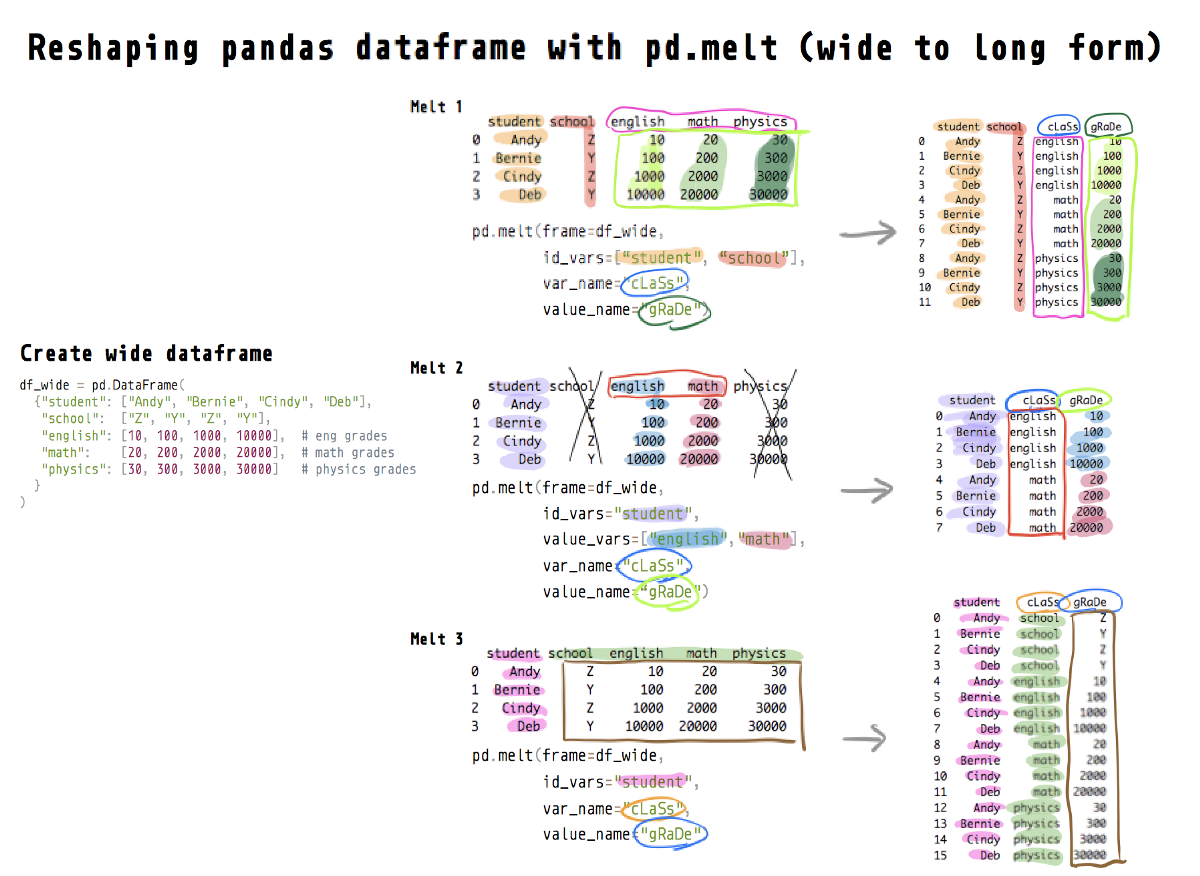

In [92]:
df

,nombre,edad,sexo,peso,altura,colesterol,diabetes,altura2,fecha_nac
0,José Luis Martínez Izquierdo,18,H,85.0,1.79,182.0,False,32041,2000-03-05
1,Rosa Díaz Díaz,32,M,65.0,1.73,232.0,False,29929,2001-05-20
2,Javier García Sánchez,24,H,NaN,1.81,191.0,True,32761,1999-12-10
3,Carmen López Pinzón,35,M,65.0,1.70,200.0,False,28900,NaT
4,Marisa López Collado,46,M,51.0,1.58,148.0,True,24964,NaT
5,Antonio Ruiz Cruz,68,H,66.0,1.74,249.0,NaN,30276,NaT
6,Antonio Fernández Ocaña,51,H,62.0,1.72,276.0,NaN,29584,NaT
7,Pilar Martín González,22,M,60.0,1.66,NaN,NaN,27556,NaT
8,Pedro Gálvez Tenorio,35,H,90.0,1.94,241.0,NaN,37636,NaT
9,Santiago Reillo Manzano,46,H,75.0,1.85,280.0,NaN,34225,NaT


In [94]:
df_reshape= df.melt(id_vars=['nombre','edad'])
df_reshape

,nombre,edad,variable,value
0,José Luis Martínez Izquierdo,18,sexo,H
1,Rosa Díaz Díaz,32,sexo,M
2,Javier García Sánchez,24,sexo,H
3,Carmen López Pinzón,35,sexo,M
4,Marisa López Collado,46,sexo,M
...,...,...,...,...
93,Santiago Reillo Manzano,46,fecha_nac,NaT
94,Macarena Álvarez Luna,53,fecha_nac,NaT
95,José María de la Guía Sanz,58,fecha_nac,NaT
96,Miguel Angel Cuadrado Gutiérrez,27,fecha_nac,NaT


In [98]:
# unmelting using pivot()
# https://www.journaldev.com/33398/pandas-melt-unmelt-pivot-function

df_unmelted = df_reshape.pivot(index=['nombre', 'edad'], columns='variable')
df_unmelted = df_unmelted['value'].reset_index()
df_unmelted.columns.name = None
df_unmelted

,nombre,edad,altura,altura2,colesterol,diabetes,fecha_nac,peso,sexo
0,Antonio Fernández Ocaña,51,1.72,29584,276.0,NaN,NaT,62.0,H
1,Antonio Ruiz Cruz,68,1.74,30276,249.0,NaN,NaT,66.0,H
2,Carmen López Pinzón,35,1.7,28900,200.0,False,NaT,65.0,M
3,Carolina Rubio Moreno,20,1.77,31329,194.0,NaN,NaT,61.0,M
4,Javier García Sánchez,24,1.81,32761,191.0,True,1999-12-10,NaN,H
5,José Luis Martínez Izquierdo,18,1.79,32041,182.0,False,2000-03-05,85.0,H
6,José María de la Guía Sanz,58,1.87,34969,198.0,NaN,NaT,78.0,H
7,Macarena Álvarez Luna,53,1.62,26244,262.0,NaN,NaT,55.0,M
8,Marisa López Collado,46,1.58,24964,148.0,True,NaT,51.0,M
9,Miguel Angel Cuadrado Gutiérrez,27,1.98,39204,210.0,NaN,NaT,109.0,H


#Combinar dataframes

    *Concatenación: Combinación de varios DataFrames concatenando sus filas o columnas.
    *Mezcla: Combinación de varios DataFrames usando columnas o índices comunes.


##Concat


In [120]:
df1 = pd.read_csv('/content/gdrive/MyDrive/datasets/Cars1.csv')
df2 = pd.read_csv('/content/gdrive/MyDrive/datasets/Cars2.csv')

In [115]:
df1.head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,data1,data2
0,18.0,8,307,130,3504,12,70,1,chevrolet chevelle malibu,NaN,NaN
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320,NaN,NaN
2,18.0,8,318,150,3436,11,70,1,plymouth satellite,NaN,NaN
3,16.0,8,304,150,3433,12,70,1,amc rebel sst,NaN,NaN
4,17.0,8,302,140,3449,10.5,70,1,ford torino,NaN,NaN
5,15.0,8,429,198,4341,10,70,1,ford galaxie 500,NaN,NaN
6,14.0,8,454,220,4354,9,70,1,chevrolet impala,NaN,NaN
7,14.0,8,440,215,4312,8.5,70,1,plymouth fury iii,NaN,NaN
8,14.0,8,455,225,4425,10,70,1,pontiac catalina,NaN,NaN
9,15.0,8,390,190,3850,8.5,70,1,amc ambassador dpl,NaN,NaN


In [112]:
df2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,33.0,4,91,53,1795,17.4,76,3,honda civic
1,20.0,6,225,100,3651,17.7,76,1,dodge aspen se
2,18.0,6,250,78,3574,21,76,1,ford granada ghia
3,18.5,6,250,110,3645,16.2,76,1,pontiac ventura sj
4,17.5,6,258,95,3193,17.8,76,1,amc pacer d/l


In [121]:
del(df1['data1'])
del(df1['data2'])
df1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8,307,130,3504,12,70,1,chevrolet chevelle malibu
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318,150,3436,11,70,1,plymouth satellite
3,16.0,8,304,150,3433,12,70,1,amc rebel sst
4,17.0,8,302,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
193,24.0,6,200,81,3012,17.6,76,1,ford maverick
194,22.5,6,232,90,3085,17.6,76,1,amc hornet
195,29.0,4,85,52,2035,22.2,76,1,chevrolet chevette
196,24.5,4,98,60,2164,22.1,76,1,chevrolet woody


In [126]:
print(df1.shape)
print(df2.shape)

(198, 9)
(200, 9)


In [124]:
Ptotal_cars = pd.concat([df1,df2])
total_cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8,307,130,3504,12,70,1,chevrolet chevelle malibu
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318,150,3436,11,70,1,plymouth satellite
3,16.0,8,304,150,3433,12,70,1,amc rebel sst
4,17.0,8,302,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
195,27.0,4,140,86,2790,15.6,82,1,ford mustang gl
196,44.0,4,97,52,2130,24.6,82,2,vw pickup
197,32.0,4,135,84,2295,11.6,82,1,dodge rampage
198,28.0,4,120,79,2625,18.6,82,1,ford ranger


##Merge - (join)

In this exercise, we'll merge the details of students from two datasets, namely student.csv and marks.csv. The student dataset contains columns such as Age, Gender, Grade, and Employed. The marks.csv dataset contains columns such as Mark and City. The Student_id column is common between the two datasets. Follow these steps to complete this exercise. Reference: Data Science with Python By Rohan Chopra, Aaron England, Mohamed Noordeen Alaudeen July 2019 https://subscription.packtpub.com/book/data/9781838552862/1/ch01lvl1sec06/data-integration


In [99]:
df1 = pd.read_csv('/content/gdrive/MyDrive/datasets/mark.csv')
df2 = pd.read_csv('/content/gdrive/MyDrive/datasets/student.csv')


In [100]:
df1.head()

,Student_id,Mark,City
0,1,95,Chennai
1,2,70,Delhi
2,3,98,Mumbai
3,4,75,Pune
4,5,89,Kochi


In [101]:
df2.head()

,Student_id,Age,Gender,Grade,Employed
0,1,19,Male,1st Class,yes
1,2,20,Female,2nd Class,no
2,3,18,Male,1st Class,no
3,4,21,Female,2nd Class,no
4,5,19,Male,1st Class,no


In [105]:
df_completo = pd.merge(df1, df2, on = 'Student_id')
df_completo.head()

,Student_id,Mark,City,Age,Gender,Grade,Employed
0,1,95,Chennai,19,Male,1st Class,yes
1,2,70,Delhi,20,Female,2nd Class,no
2,3,98,Mumbai,18,Male,1st Class,no
3,4,75,Pune,21,Female,2nd Class,no
4,5,89,Kochi,19,Male,1st Class,no
